In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import seaborn as sns

font_path = "C:/Windows/Fonts/msgothic.ttc"
jp_font = fm.FontProperties(fname=font_path)
plt.rcParams["font.family"] = "Yu Gothic"

In [2]:
names = [
    "race_id",
    "year",
    "month",
    "day",
    "times",
    "place",
    "daily",
    "race_num",
    "horse",
    "jockey_id",
    "horse_N",
    "waku_num",
    "horse_num",
    "class_code",
    "track_code",
    "corner_num",
    "dist",
    "state",
    "weather",
    "age_code",
    "sex",
    "age",
    "basis_weight",
    "blinker",
    "weight",
    "inc_dec",
    "weight_code",
    "win_odds",
    "rank",
    "time_diff",
    "time",
    "corner1_rank",
    "corner2_rank",
    "corner3_rank",
    "corner4_rank",
    "last_3F_time",
    "last_3F_rank",
    "Ave_3F",
    "PCI",
    "last_3F_time_diff",
    "leg",
    "pop",
    "prize",
    "error_code",
    "father",
    "mother",
    "id"
]


In [3]:
df = pd.read_csv("record_data_2023.csv", encoding="shift_jis", header=None, names=names)
df.head()

,race_id,year,month,day,times,place,daily,race_num,horse,jockey_id,...,Ave_3F,PCI,last_3F_time_diff,leg,pop,prize,error_code,father,mother,id
0,202307220101010101,23,7,22,1,札幌,1,1,ウィスピースノー,1095,...,35.8,53.8,0.8,後方,5.0,55,0,ワールドエース,ハイリマイリ,2021100648
1,202307220101010102,23,7,22,1,札幌,1,1,ロードスタウト,1157,...,35.6,51.4,0.6,中団,7.0,0,0,ロードカナロア,フィラデルフィア,2021100159
2,202307220101010103,23,7,22,1,札幌,1,1,コミックガール,1197,...,35.6,50.8,0.6,中団,4.0,0,0,シルバーステート,コイクレナイ,2021100265
3,202307220101010104,23,7,22,1,札幌,1,1,デビルシズカチャン,5339,...,35.3,51.1,0.3,先行,3.0,83,0,ベストウォーリア,シシリアンブリーズ,2021105553
4,202307220101010105,23,7,22,1,札幌,1,1,サトミノキラリ,1170,...,35.2,52.6,0.2,先行,1.0,550,0,ビッグアーサー,パレード,2021101429


In [4]:
df.columns

Index(['race_id', 'year', 'month', 'day', 'times', 'place', 'daily',
       'race_num', 'horse', 'jockey_id', 'horse_N', 'waku_num', 'horse_num',
       'class_code', 'track_code', 'corner_num', 'dist', 'state', 'weather',
       'age_code', 'sex', 'age', 'basis_weight', 'blinker', 'weight',
       'inc_dec', 'weight_code', 'win_odds', 'rank', 'time_diff', 'time',
       'corner1_rank', 'corner2_rank', 'corner3_rank', 'corner4_rank',
       'last_3F_time', 'last_3F_rank', 'Ave_3F', 'PCI', 'last_3F_time_diff',
       'leg', 'pop', 'prize', 'error_code', 'father', 'mother', 'id'],
      dtype='object')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47672 entries, 0 to 47671
Data columns (total 47 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   race_id            47672 non-null  int64  
 1   year               47672 non-null  int64  
 2   month              47672 non-null  int64  
 3   day                47672 non-null  int64  
 4   times              47672 non-null  int64  
 5   place              47672 non-null  object 
 6   daily              47672 non-null  object 
 7   race_num           47672 non-null  int64  
 8   horse              47672 non-null  object 
 9   jockey_id          47672 non-null  int64  
 10  horse_N            47672 non-null  int64  
 11  waku_num           47672 non-null  int64  
 12  horse_num          47672 non-null  int64  
 13  class_code         47672 non-null  int64  
 14  track_code         47672 non-null  int64  
 15  corner_num         46212 non-null  float64
 16  dist               476

In [6]:
for col in names:
    num_of_null = df[col].isna().sum()
    print(f"{col}: {num_of_null}")

df["race_code"] = df["race_id"] // 100

race_id: 0
year: 0
month: 0
day: 0
times: 0
place: 0
daily: 0
race_num: 0
horse: 0
jockey_id: 0
horse_N: 0
waku_num: 0
horse_num: 0
class_code: 0
track_code: 0
corner_num: 1460
dist: 0
state: 0
weather: 0
age_code: 0
sex: 0
age: 0
basis_weight: 0
blinker: 41866
weight: 79
inc_dec: 4838
weight_code: 0
win_odds: 179
rank: 0
time_diff: 0
time: 0
corner1_rank: 0
corner2_rank: 0
corner3_rank: 0
corner4_rank: 0
last_3F_time: 398
last_3F_rank: 1460
Ave_3F: 1769
PCI: 1770
last_3F_time_diff: 1769
leg: 398
pop: 179
prize: 0
error_code: 0
father: 0
mother: 0
id: 0


In [7]:
df["target1"] = df["rank"].apply(lambda x: 1 if x == 1 else 0)
df["target1_3"] = df["rank"].apply(lambda x: 1 if 1 <= x <= 3 else 0)
df["target1_3"]

0        0
1        0
2        0
3        0
4        1
        ..
47667    1
47668    0
47669    0
47670    1
47671    0
Name: target1_3, Length: 47672, dtype: int64

# 単変量解析

### year

In [8]:
df.year.unique()

array([23])

2023年のデータしかないっぽい

### month

In [9]:
sorted(df.month.unique())

[np.int64(1),
 np.int64(2),
 np.int64(3),
 np.int64(4),
 np.int64(5),
 np.int64(6),
 np.int64(7),
 np.int64(8),
 np.int64(9),
 np.int64(10),
 np.int64(11),
 np.int64(12)]

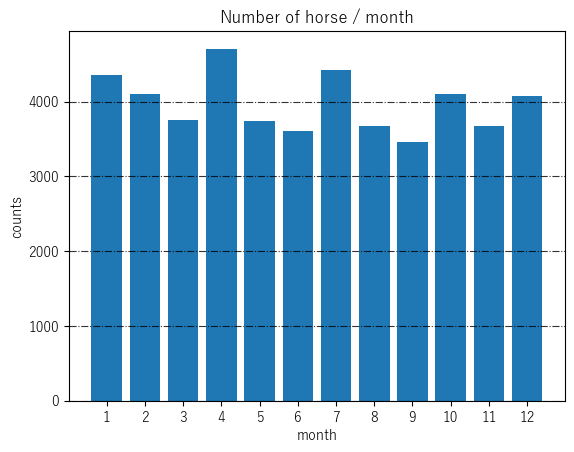

In [10]:
tmp = df["month"].value_counts().sort_index()
plt.bar(tmp.index, tmp.values)
plt.title("Number of horse / month")
plt.xlabel("month")
plt.ylabel("counts")
plt.xticks(tmp.index)
plt.grid(which="major", axis="y", color="black", alpha=.8, linestyle="-.")

C:\Users\ken05\AppData\Local\Temp\ipykernel_15868\3654941155.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tmp.race_id = tmp.race_id // 100


Text(0.5, 1.0, 'Number of racing / month')

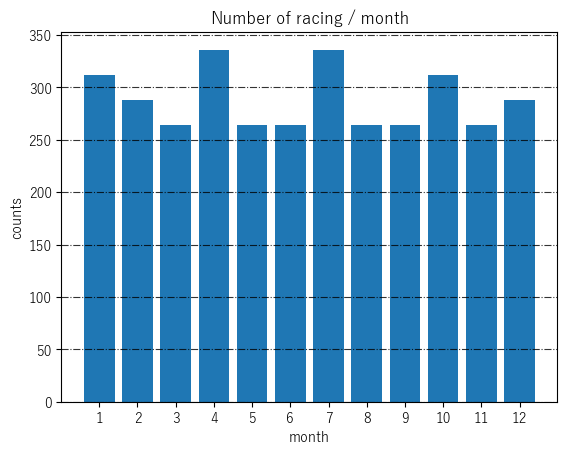

In [11]:
tmp = df[["race_id", "month"]]
tmp.race_id = tmp.race_id // 100
tmp = tmp.drop_duplicates()
tmp = tmp["month"].value_counts().sort_index()

plt.bar(tmp.index, tmp.values)
plt.xticks(tmp.index)
plt.xlabel("month")
plt.ylabel("counts")
plt.grid(linestyle="-.", axis="y", color="black", alpha=.8, which="major")
plt.title("Number of racing / month")

(0.0, 0.22890173410404624)

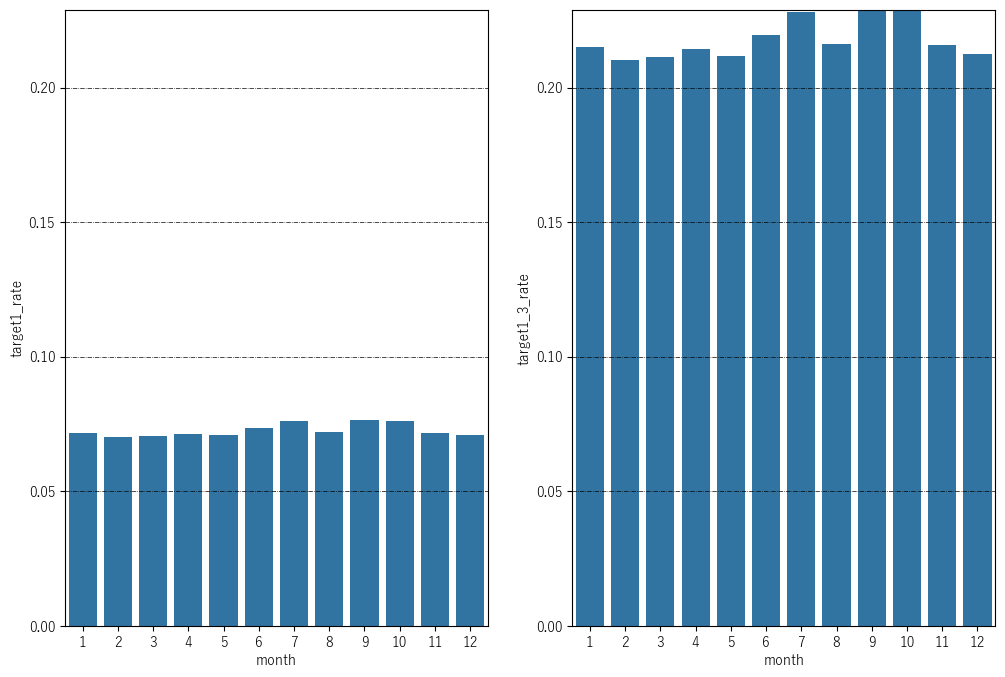

In [12]:
tmp = df.groupby(["month"])[["target1", "target1_3"]].sum().sort_index()
tmp = pd.concat([tmp, df["month"].value_counts()], axis=1)
tmp["target1_rate"] = tmp.target1 / tmp["count"]
tmp["target1_3_rate"] = tmp.target1_3 / tmp["count"]

f, axes = plt.subplots(1, 2, figsize=(12, 8))
ymax = max(tmp["target1_3_rate"].max(), tmp["target1_rate"].max())

sns.barplot(tmp, x=tmp.index, y="target1_rate", ax=axes[0])
axes[0].grid(color="black", linestyle="-.", linewidth=0.5, axis="y", which="major")
sns.barplot(tmp, x=tmp.index, y="target1_3_rate", ax=axes[1])
axes[1].grid(color="black", linestyle="-.", linewidth=0.5, axis="y", which="major")

axes[0].set_ylim(0, ymax)
axes[1].set_ylim(0, ymax)

各月に対して大きなtarget値の分布の違いはない

### day

In [13]:
sorted(df.day.unique())

[np.int64(1),
 np.int64(2),
 np.int64(3),
 np.int64(4),
 np.int64(5),
 np.int64(6),
 np.int64(7),
 np.int64(8),
 np.int64(9),
 np.int64(10),
 np.int64(11),
 np.int64(12),
 np.int64(13),
 np.int64(14),
 np.int64(15),
 np.int64(16),
 np.int64(17),
 np.int64(18),
 np.int64(19),
 np.int64(20),
 np.int64(21),
 np.int64(22),
 np.int64(23),
 np.int64(24),
 np.int64(25),
 np.int64(26),
 np.int64(27),
 np.int64(28),
 np.int64(29),
 np.int64(30)]

### times

In [14]:
df.times.unique()

array([1, 2, 3, 4, 5])

中央競馬は4週8日間で1回という単位になっており、1回ごとにメインとなる会場が入れ替わる。

In [103]:
tmp = df.groupby(["month", "place"])["times"].value_counts()
tmp


month  place  times
1      中京     1        1579
       中山     1        1408
       小倉     1        1020
       東京     1         342
2      中京     1         301
       中山     2         353
       小倉     2        1065
              1         336
       東京     1        1078
       阪神     1         974
3      中京     2        1050
       中山     2        1092
              3         343
       阪神     1         940
              2         325
4      中山     3        1009
       京都     1         663
       新潟     1         334
       東京     2         681
       福島     1        1050
       阪神     2         970
5      京都     1        1324
       新潟     1        1009
       東京     2        1411
6      函館     1         908
       東京     3        1376
       阪神     3        1326
7      中京     3        1293
       函館     2         860
       新潟     2         340
       札幌     1         615
       福島     2        1318
8      小倉     3        1030
       新潟     3        1058
              2         345


### place

Text(0, 0.5, 'counts')

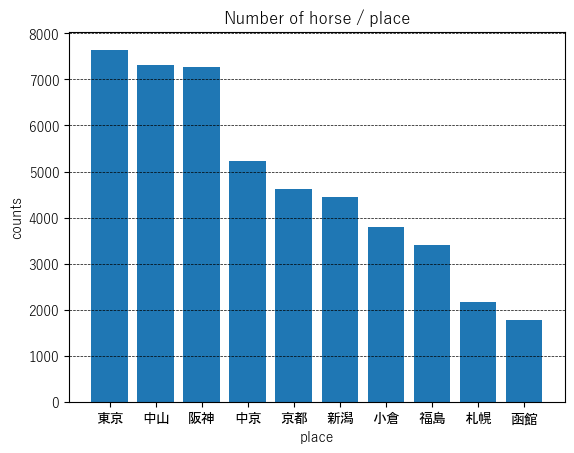

In [16]:
tmp = df.place.value_counts()
plt.bar(tmp.index, tmp)
plt.xticks(fontproperties=jp_font)
plt.grid(which = "major", axis = "y", color = "black", alpha = 1,
        linestyle = "--", linewidth = 0.5)
plt.title("Number of horse / place")
plt.xlabel("place")
plt.ylabel("counts")

C:\Users\ken05\AppData\Local\Temp\ipykernel_15868\3028451532.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tmp.race_id = tmp.race_id // 100


Text(0.5, 1.0, 'Number of racing / place')

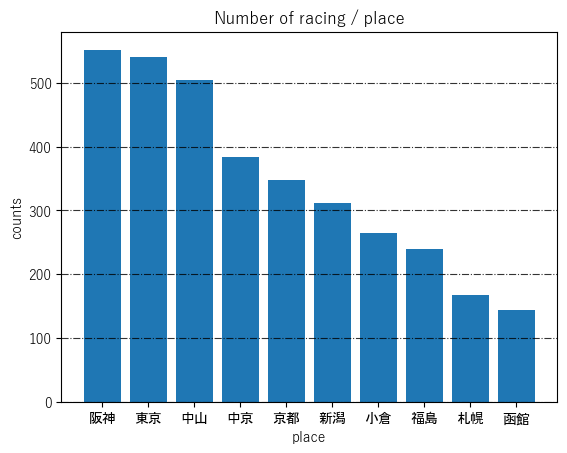

In [17]:
tmp = df[["place", "race_id"]]
tmp.race_id = tmp.race_id // 100
tmp = tmp.drop_duplicates()
tmp = tmp["place"].value_counts()

plt.bar(tmp.index, tmp.values)
plt.xticks(tmp.index, fontproperties=jp_font)
plt.xlabel("place")
plt.ylabel("counts")
plt.grid(linestyle="-.", axis="y", color="black", alpha=.8, which="major")
plt.title("Number of racing / place")

全て中央競馬のレース、場所によってかなり差がある

### daily

In [18]:
df.daily.unique()

array(['1', '2', '3', '4', '5', '6', '7', '8', '9', 'A', 'B', 'C'],
      dtype=object)

In [19]:
tmp = df.copy()
tmp.daily = tmp.daily.replace({"A": "10", "B": "11", "C": "12"})
tmp.daily = tmp.daily.astype(int)
tmp["times_place"] = tmp.times.astype(str) + tmp.place
tmp.groupby(["times_place"])["daily"].max()

times_place
1中京    12
1中山     8
1京都    12
1函館     6
1小倉     8
1新潟     8
1札幌     6
1東京     8
1福島     6
1阪神    12
2中京     6
2中山     8
2京都     9
2函館     6
2小倉     6
2新潟     4
2札幌     8
2東京    12
2福島     8
2阪神     8
3中京     8
3中山     8
3京都     8
3小倉     8
3新潟     8
3東京     8
3福島     6
3阪神     8
4中京     6
4中山     9
4新潟     6
4東京     9
4阪神     9
5中山     9
5東京     8
5阪神     9
Name: daily, dtype: int64

開催日数はかなりばらつきがあることが分かった

In [20]:
tmp["times_place_daily"] = tmp["times_place"] + tmp.daily.astype(str)
tmp.groupby(["times_place_daily"])["race_num"].max().sort_values()

times_place_daily
5阪神9    12
5阪神8    12
5阪神7    12
5阪神6    12
5阪神5    12
        ..
1京都1    12
1中山8    12
1中山7    12
1中山6    12
1中山5    12
Name: race_num, Length: 288, dtype: int64

どの開催日時でもレースは12Rまで行われるらしい。

### jockey_id

In [21]:
print(df.jockey_id.nunique())
df.jockey_id.unique()

198


array([1095, 1157, 1197, 5339, 1170, 1093, 1205, 1115, 1178, 1140, 1109,
       1193, 1185, 1191, 1192, 1032, 1091, 1173, 1176, 1102, 1190,  660,
       1177, 1025, 1015,  666, 1186, 1202, 1146, 1168, 1166, 5203, 1030,
       1194, 1112, 1198,  689, 5243, 5286, 1124, 1018, 1108, 1043, 1122,
       1179, 5212, 1126, 5502,  641, 1165, 1142, 1171, 5534, 1150, 5492,
       1085, 5509, 1088, 5578, 1134, 5386, 1125, 1174, 5644, 5472, 5641,
       1143, 5643, 5640, 1207, 1163, 5642, 1117, 5411, 1135, 1201, 1195,
       1203, 1164, 1092,  732, 1206, 1160, 1161,  422, 1152, 1133, 1127,
       1019, 1062, 1037, 1204, 1200, 1184, 1181, 1183, 1162, 1182, 1072,
       1123, 1069,  652, 1139, 1068, 1149, 1059, 1196, 1023, 1063, 1066,
       1067, 1120, 1087, 1052, 1187, 1144, 1114, 1141,  684, 1116, 1188,
       1169, 1138, 1082, 1167, 1147, 1119, 1009, 1118, 1153, 1061, 1151,
        691, 1180, 1099,  894, 1156, 1130, 1101, 1129, 1113, 1096, 1158,
       1077,  733,  726, 1029, 1075, 1131, 1154, 53

In [22]:
df.jockey_id.value_counts().sort_values(ascending=False).head(20)

jockey_id
1126    904
1157    878
1174    878
1091    865
1018    862
732     828
1179    817
1197    809
1170    804
1171    786
5386    783
1163    762
1188    719
1116    702
1180    682
5339    666
1092    631
1199    625
1187    621
1162    614
Name: count, dtype: int64

In [23]:
df.jockey_id.value_counts(normalize=True).sort_values(ascending=False).head(10)

jockey_id
1126    0.018963
1157    0.018418
1174    0.018418
1091    0.018145
1018    0.018082
732     0.017369
1179    0.017138
1197    0.016970
1170    0.016865
1171    0.016488
Name: proportion, dtype: float64

#### jockey_id（上位10件だけ）

- 1126 ... 松山 　弘平 騎手
- 1157 ... 鮫島 　克駿 騎手
- 1174 ... 岩田 　望来 騎手
- 1091 ... 丹内 　祐次 騎手
- 1018 ... 和田 　竜二 騎手
- 0732  ... 幸 　　英明 騎手
- 1179 ... 菅原 　明良 騎手
- 1197 ... 佐々木 大輔 騎手
- 1170 ... 横山 　武史 騎手
- 1171 ... 西村 　淳也 騎手

### horse_N

In [24]:
sorted(df.horse_N.unique())

[np.int64(5),
 np.int64(6),
 np.int64(7),
 np.int64(8),
 np.int64(9),
 np.int64(10),
 np.int64(11),
 np.int64(12),
 np.int64(13),
 np.int64(14),
 np.int64(15),
 np.int64(16),
 np.int64(17),
 np.int64(18)]

In [25]:
# 各頭数に対して何レース行われているか調べている。
tmp = df.horse_N.value_counts()
tmp = pd.Series(tmp.values / tmp.index, index=tmp.index)
tmp = tmp.sort_index()
tmp

horse_N
5       10.0
6       21.0
7       41.0
8      101.0
9      155.0
10     199.0
11     255.0
12     290.0
13     289.0
14     346.0
15     366.0
16    1099.0
17      56.0
18     228.0
Name: horse_N, dtype: float64

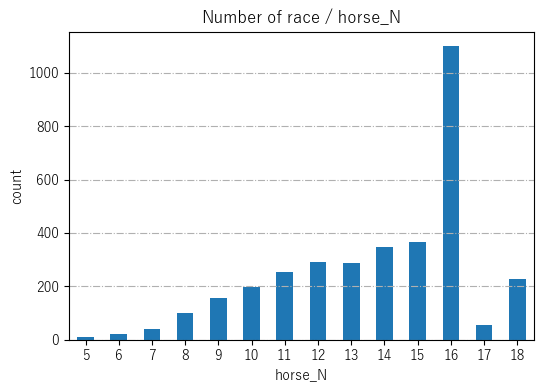

In [26]:
tmp.plot(kind='bar', figsize=(6, 4))
plt.title('Number of race / horse_N')
plt.xlabel('horse_N')
plt.ylabel('count')
plt.grid(which="both", axis="y", alpha=1, linestyle="-.")
plt.xticks(rotation=0)
plt.show()


枠番・馬番はスキップ

### class_code

In [27]:
df.class_code.unique()

array([  7,  15,  23,  43,  67, 131, 163, 115, 179, 195])

#### 各class_codeの説明
- 7 ... 未勝利戦？
  - 2歳未勝利(混合)[指定]
  - 3歳未勝利　 
  - 3歳未勝利牝
  - メイクデビューは含まれていない？
- 15 ... メイクデビュー
- 23 ... 1勝クラス
- 43 ... 2勝クラス
- 67 ... 3勝クラス
- 115 ... L (リステッド、オープン戦の中でも特に質の高い競争のこと。2019年から導入)
- 131 ... オープン(全ての馬が出走できるレース)
- 163 ... G3
- 179 ... G2
- 195 ... G1

class_code
7      17538
15      3931
23     12450
43      6323
67      3084
115      833
131     1451
163     1052
179      585
195      425
Name: count, dtype: int64

Text(0.5, 1.0, 'Number of horse / class_code')

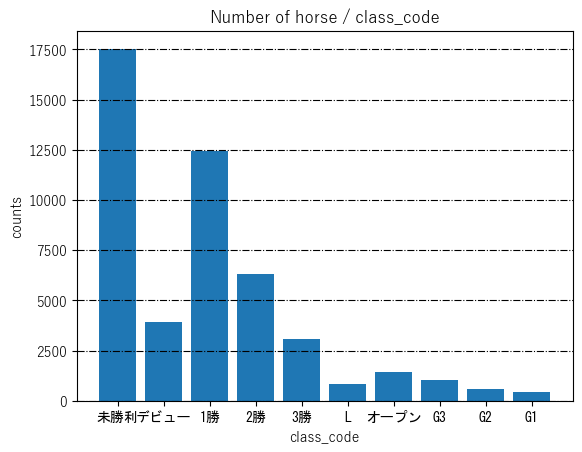

In [28]:
tmp = df["class_code"].astype(str).value_counts()
tmp.index = tmp.index.astype(int)
tmp = tmp.sort_index()
display(tmp)
tmp.index = ["未勝利", "デビュー", "1勝", "2勝", "3勝", "L", "オープン", "G3", "G2", "G1"]
plt.bar(tmp.index, tmp.values)
plt.xticks(tmp.index, fontproperties=jp_font)
plt.xlabel("class_code")
plt.ylabel("counts")
plt.grid(which="major", color="black", axis="y", linestyle="-.")
plt.title("Number of horse / class_code")

C:\Users\ken05\AppData\Local\Temp\ipykernel_15868\1849012365.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tmp.race_id = tmp.race_id // 100


<function matplotlib.pyplot.xticks(ticks: 'ArrayLike | None' = None, labels: 'Sequence[str] | None' = None, *, minor: 'bool' = False, **kwargs) -> 'tuple[list[Tick] | np.ndarray, list[Text]]'>

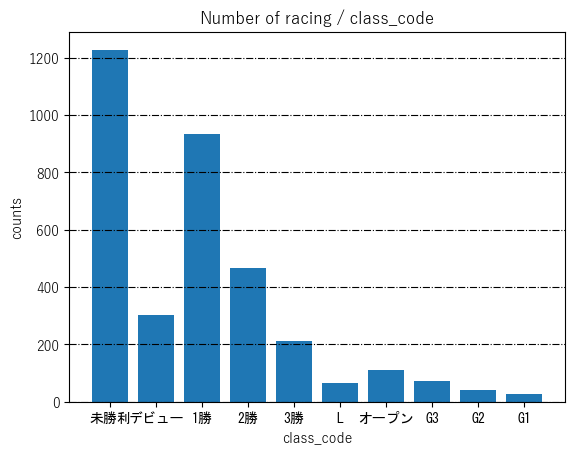

In [29]:
tmp = df[["class_code", "race_id"]]
tmp.race_id = tmp.race_id // 100
tmp = tmp.drop_duplicates()
tmp = tmp.class_code.value_counts()
tmp.index = tmp.index.astype(int)
tmp = tmp.sort_index()
tmp.index = tmp.index.astype(str)
tmp.index = ["未勝利", "デビュー", "1勝", "2勝", "3勝", "L", "オープン", "G3", "G2", "G1"]
plt.bar(tmp.index, tmp.values)
plt.xticks(tmp.index, fontproperties=jp_font)
plt.xlabel("class_code")
plt.ylabel("counts")
plt.grid(which="major", color="black", axis="y", linestyle="-.")
plt.title("Number of racing / class_code")

plt.xticks

### track_code

In [30]:
sorted(df.track_code.unique())

[np.int64(10),
 np.int64(11),
 np.int64(12),
 np.int64(17),
 np.int64(18),
 np.int64(21),
 np.int64(23),
 np.int64(24),
 np.int64(52),
 np.int64(54),
 np.int64(55),
 np.int64(56),
 np.int64(57)]

- 10	平地　芝 　　 直線
- 11	平地　芝 　　 左回り
- 12    平地　芝  　　左回り  外回り
- 17	平地　芝  　　右回り
- 18	平地　芝  　　右回り  外回り
- 21	平地　芝  　　右回り  内２周
- 23	平地　ダート  左回り 
- 24	平地　ダート  右回り
- 52	障害　芝　ダート	
- 54	障害　芝
- 55	障害　芝  外回り	
- 56	障害　芝  外－内回り 	
- 57	障害　芝  内－外回り	

track_code
10      370
11     6640
12      979
17    10275
18     4250
21       16
23     8884
24    14798
52      377
54      730
55       24
56      317
57       12
Name: count, dtype: int64

Text(0.5, 1.0, 'Number of horse / track_code')

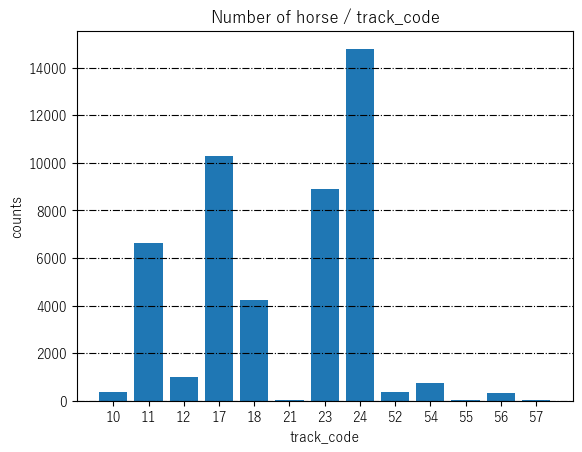

In [31]:
tmp = df[["track_code"]]
tmp = tmp.track_code.value_counts().sort_index()
tmp.index = tmp.index.astype(str)
display(tmp)
plt.bar(tmp.index, tmp.values)
plt.xticks(tmp.index)
plt.xlabel("track_code")
plt.ylabel("counts")
plt.grid(which="major", color="black", axis="y", linestyle="-.")
plt.title("Number of horse / track_code")

C:\Users\ken05\AppData\Local\Temp\ipykernel_15868\3658436114.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tmp.race_id = tmp.race_id // 100


track_code
10      22
11     498
12      71
17     758
18     327
21       1
23     605
24    1047
52      35
54      63
55       2
56      26
57       1
Name: count, dtype: int64

Text(0.5, 1.0, 'Number of racing / track_code')

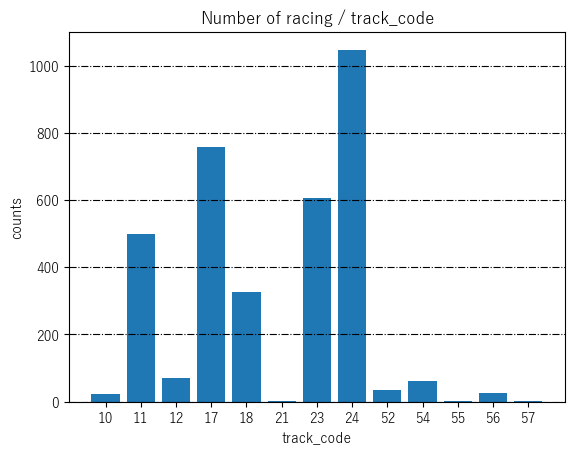

In [32]:
tmp = df[["track_code", "race_id"]]
tmp.race_id = tmp.race_id // 100
tmp = tmp.drop_duplicates()
tmp = tmp.track_code.value_counts().sort_index()
tmp.index = tmp.index.astype(str)
display(tmp)
plt.bar(tmp.index, tmp.values)
plt.xticks(tmp.index)
plt.xlabel("track_code")
plt.ylabel("counts")
plt.grid(which="major", color="black", axis="y", linestyle="-.")
plt.title("Number of racing / track_code")

### corner_num

In [33]:
sorted(df.corner_num.unique())

[np.float64(0.0),
 np.float64(2.0),
 np.float64(3.0),
 np.float64(4.0),
 np.float64(6.0),
 np.float64(nan),
 np.float64(5.0)]

In [34]:
course_type_dict = {
    10: '平地芝',
    11: '平地芝',
    12: '平地芝',
    17: '平地芝',
    18: '平地芝',
    21: '平地芝',
    23: '平地ダート',
    24: '平地ダート',
    52: '障害芝ダート',
    54: '障害芝',
    55: '障害芝',
    56: '障害芝',
    57: '障害芝'
}

df["race_type"] = df["track_code"].replace(course_type_dict)

In [35]:
tmp = df.copy()
tmp["race_identify"] = df["place"] + df["race_type"] + df["dist"].astype(str)
tmp = tmp[["race_identify", "corner_num", "race_type"]]
tmp = tmp.drop_duplicates()[tmp.corner_num.isna()]
print(tmp.shape)
print(tmp.race_type.unique())
tmp.head(10)


(29, 3)
['障害芝' '障害芝ダート']


C:\Users\ken05\AppData\Local\Temp\ipykernel_15868\2338744162.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  tmp = tmp.drop_duplicates()[tmp.corner_num.isna()]


,race_identify,corner_num,race_type
3989,福島障害芝2750,NaN,障害芝
4701,福島障害芝3380,NaN,障害芝
4715,福島障害芝2770,NaN,障害芝
7343,新潟障害芝2890,NaN,障害芝
8370,新潟障害芝3290,NaN,障害芝
8729,新潟障害芝3250,NaN,障害芝
9550,新潟障害芝2850,NaN,障害芝
14991,東京障害芝ダート3000,NaN,障害芝ダート
16442,東京障害芝3110,NaN,障害芝
19726,中山障害芝ダート3200,NaN,障害芝ダート


どうやら障害コースのコーナー回数が分かっていないらしい。

In [36]:
df[(df.corner_num.notna()) & (df.race_type == "障害芝")]

,race_id,year,month,day,times,place,daily,race_num,horse,jockey_id,...,pop,prize,error_code,father,mother,id,race_code,target1,target1_3,race_type


In [37]:
df[(df.corner_num.notna()) & (df.race_type == "障害芝ダート")]

,race_id,year,month,day,times,place,daily,race_num,horse,jockey_id,...,pop,prize,error_code,father,mother,id,race_code,target1,target1_3,race_type


以上から、障害コースのコーナー回数は欠損値になっている

C:\Users\ken05\AppData\Local\Temp\ipykernel_15868\2861131053.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tmp["corner_num"] = tmp["corner_num"].fillna(-1)


corner_num
-1.0     1460
 0.0      370
 2.0    24144
 3.0     2317
 4.0    18399
 5.0      132
 6.0      850
Name: count, dtype: int64

Text(0.5, 1.0, 'Number of horse / corner_num')

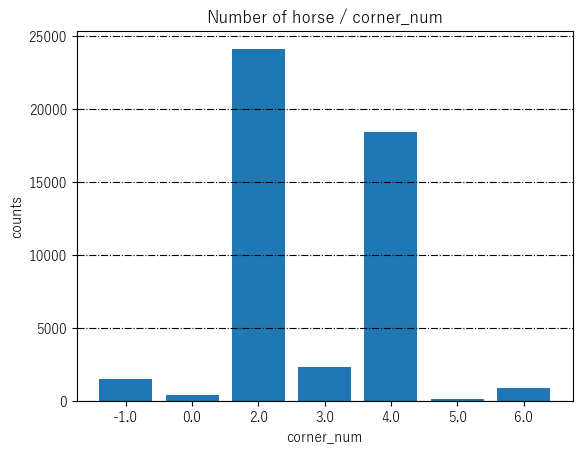

In [38]:
tmp = df[["corner_num", "race_code"]]
tmp["corner_num"] = tmp["corner_num"].fillna(-1)
tmp = tmp["corner_num"].value_counts().sort_index()

display(tmp)
tmp.index = tmp.index.astype(str)
plt.bar(tmp.index, tmp.values)
plt.xticks(tmp.index)
plt.xlabel("corner_num")
plt.ylabel("counts")
plt.grid(which="major", color="black", axis="y", linestyle="-.")
plt.title("Number of horse / corner_num")

C:\Users\ken05\AppData\Local\Temp\ipykernel_15868\1383202584.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tmp["corner_num"] = tmp["corner_num"].fillna(-1)


corner_num
-1.0     127
 0.0      22
 2.0    1683
 3.0     178
 4.0    1370
 5.0      10
 6.0      66
Name: count, dtype: int64

Text(0.5, 1.0, 'Number of racing / corner_num')

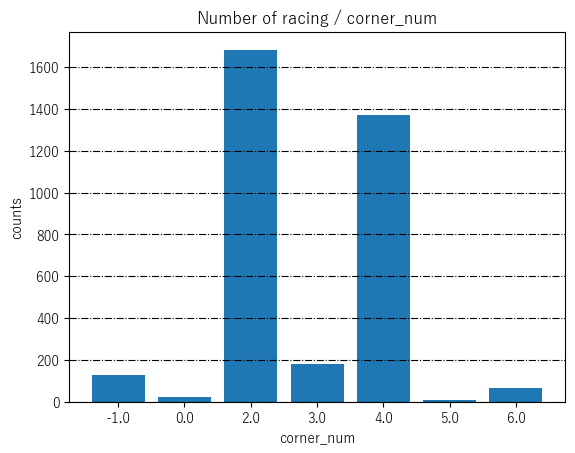

In [39]:
tmp = df[["corner_num", "race_code"]]
tmp["corner_num"] = tmp["corner_num"].fillna(-1)
tmp = tmp.drop_duplicates()
tmp = tmp["corner_num"].value_counts().sort_index()

display(tmp)
tmp.index = tmp.index.astype(str)
plt.bar(tmp.index, tmp.values)
plt.xticks(tmp.index)
plt.xlabel("corner_num")
plt.ylabel("counts")
plt.grid(which="major", color="black", axis="y", linestyle="-.")
plt.title("Number of racing / corner_num")

In [40]:
def plot_bar_horse(df, col, rotation=False):
    tmp = df[col].value_counts().sort_index()
    display(tmp)
    tmp.index = tmp.index.astype(str)
    plt.figure(figsize=(12,8))
    plt.bar(tmp.index, tmp.values)
    if rotation :
        plt.xticks(tmp.index, rotation=90, fontproperties=jp_font)
    else:
        plt.xticks(tmp.index, fontproperties=jp_font)
    plt.xlabel(col)
    plt.ylabel("counts")
    plt.grid(which="major", color="black", axis="y", linestyle="-.")
    plt.title(f"Number of horse / {col}")


def plot_bar_racing(df, col, rotation=False):
    tmp = df[[col, "race_code"]]
    tmp = tmp.drop_duplicates()
    tmp = tmp[col].value_counts().sort_index()
    display(tmp)
    tmp.index = tmp.index.astype(str)
    plt.figure(figsize=(12,8))
    plt.bar(tmp.index, tmp.values)
    if rotation:
        plt.xticks(tmp.index, rotation=90, fontproperties=jp_font)
    else :
        plt.xticks(tmp.index, fontproperties=jp_font)
    plt.xlabel(col)
    plt.ylabel("counts")
    plt.grid(which="major", color="black", axis="y", linestyle="-.")
    plt.title(f"Number of racing / {col}")


### dist

In [41]:
df.dist.unique()

array([1200, 1000, 1700, 1500, 1800, 2000, 2600, 2400, 2750, 1150, 3380,
       2770, 2890, 1600, 1400, 2200, 3290, 3250, 2850, 2500, 2100, 1300,
       3400, 2300, 3000, 3110, 3200, 2880, 3350, 4250, 3210, 3570, 3600,
       4100, 1900, 3300, 3330, 3930, 2910, 3170, 2970, 3900, 3140, 2860,
       3390])

dist
1000     86
1150     37
1200    631
1300     24
1400    440
1500     21
1600    425
1700    205
1800    799
1900     44
2000    368
2100     38
2200     70
2300      2
2400     77
2500     15
2600     39
2750     12
2770      6
2850     12
2860     21
2880     10
2890     10
2910      3
2970     10
3000     14
3110      8
3140      2
3170      2
3200      2
3210      1
3250      3
3290      1
3300      1
3330      1
3350      1
3380      3
3390      5
3400      1
3570      1
3600      1
3900      1
3930      1
4100      1
4250      1
Name: count, dtype: int64

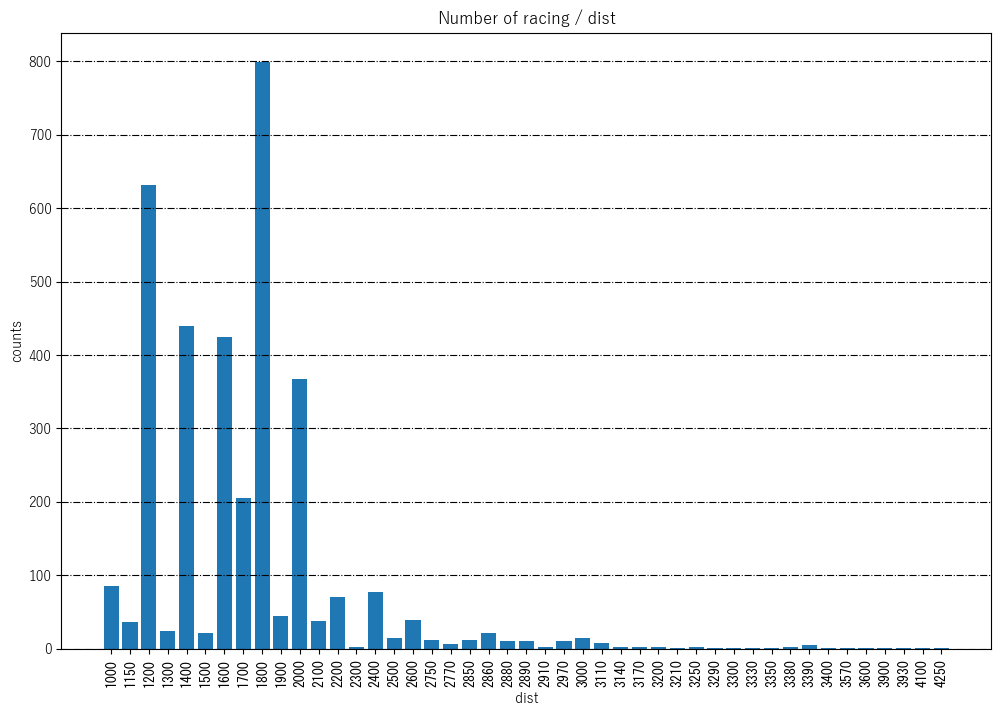

In [42]:
plot_bar_racing(df, "dist", rotation=True)

### state

In [43]:
df.state.unique()

array(['良', '不', '稍', '重'], dtype=object)

- 良　... 踏みしめた際、馬場の表面はほとんど変化しない状態
- 不　... 表面や足跡に水が浮いている状態。
- 稍　... 踏みしめた際に水は染み出ないが、馬場の表面がやや凹む状態。
- 重　... 表面に水は浮いていないが、踏みしめると水が染み出る状態。

state
不     201
稍     587
良    2313
重     355
Name: count, dtype: int64

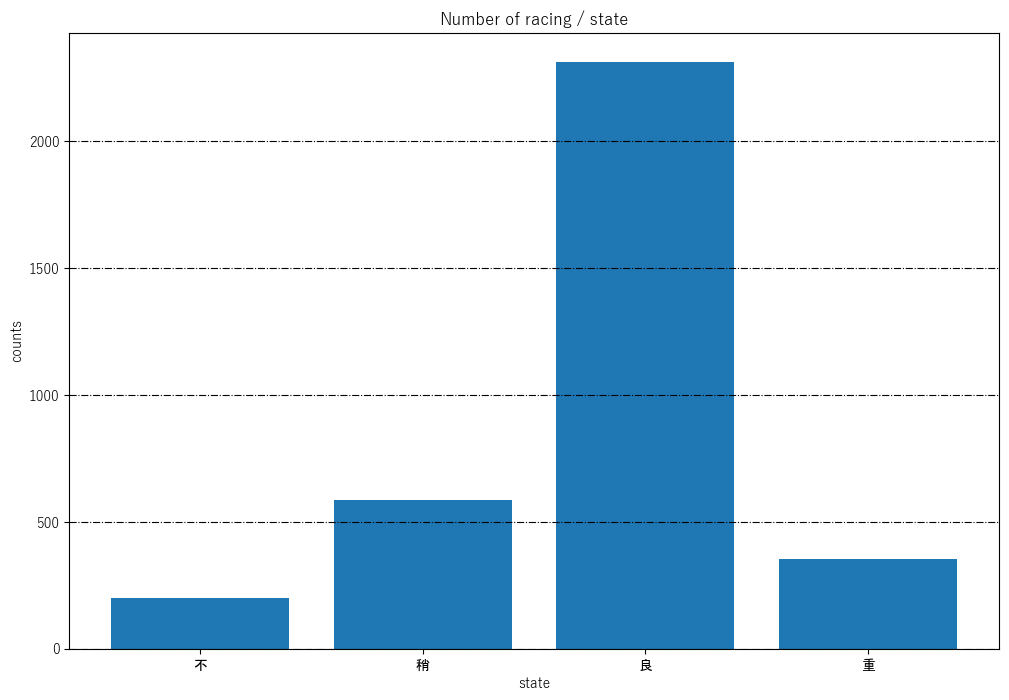

In [44]:
plot_bar_racing(df, "state")

### weather

In [45]:
df.weather.unique()

array(['晴', '曇', '雨', '小雨', '雪', '小雪'], dtype=object)

weather
小雨     153
小雪       2
晴     2093
曇     1019
雨      186
雪        3
Name: count, dtype: int64

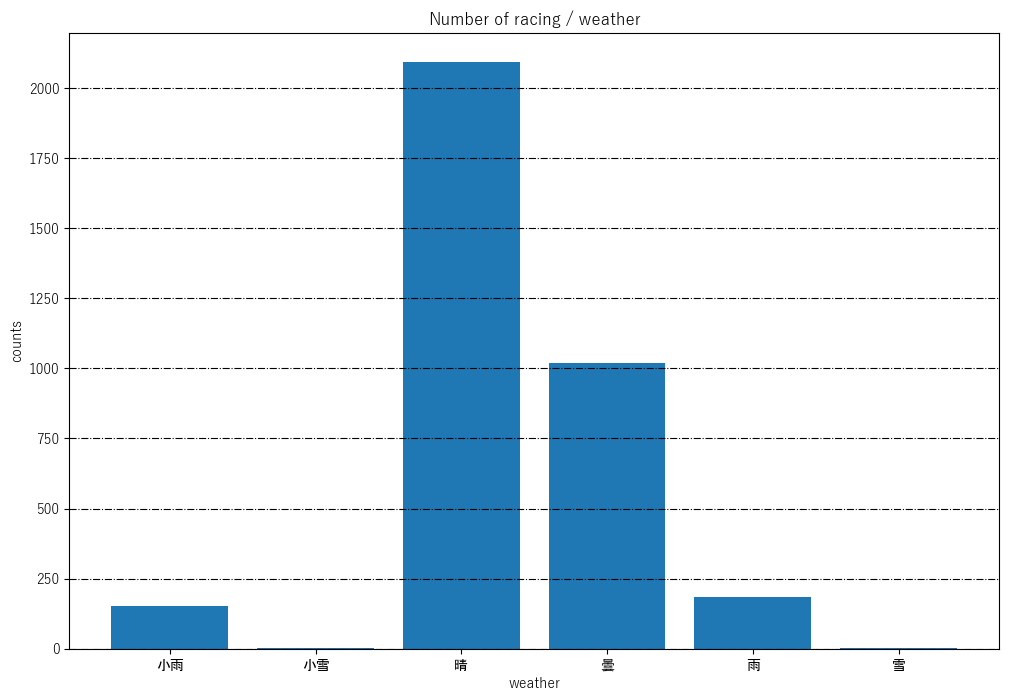

In [46]:
plot_bar_racing(df, "weather")

### age_code

In [47]:
df.age_code.unique()

array([11, 12, 13, 19, 14, 18])

- 11 ... 2歳
- 12 ... 3歳
- 13 ... 3歳以上
- 14 ... 4歳以上
- 18 ... 障害3歳以上
- 19 ... 障害4歳以上

age_code
11     645
12    1039
13     979
14     666
18      71
19      56
Name: count, dtype: int64

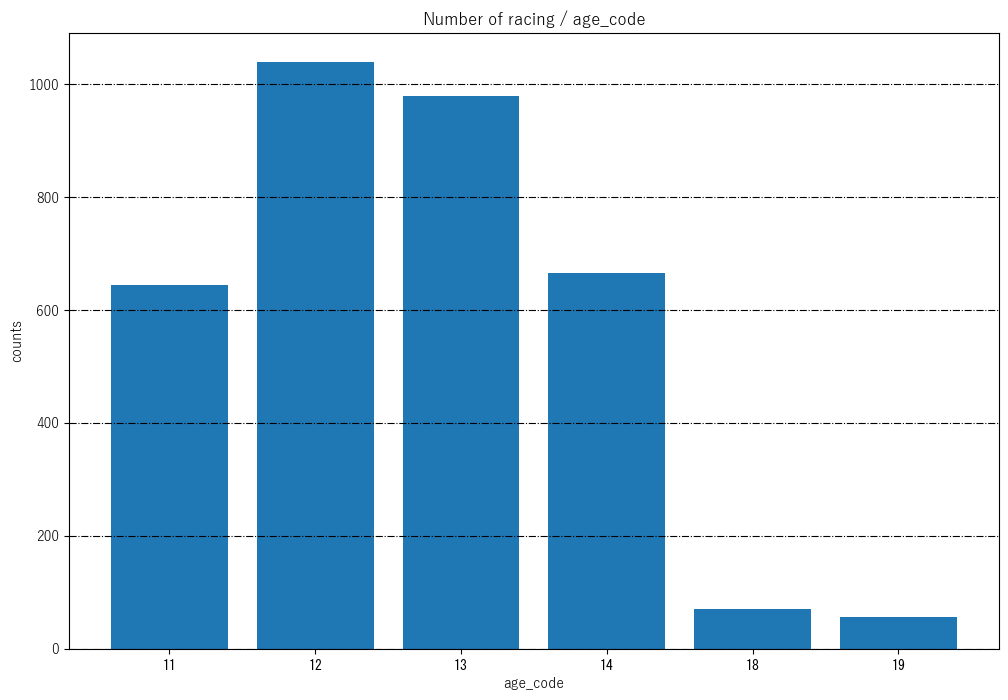

In [48]:
plot_bar_racing(df, "age_code")

### sex

In [49]:
df.sex.unique()

array(['牝', '牡', 'セ'], dtype=object)

sex
セ     2343
牝    20063
牡    25266
Name: count, dtype: int64

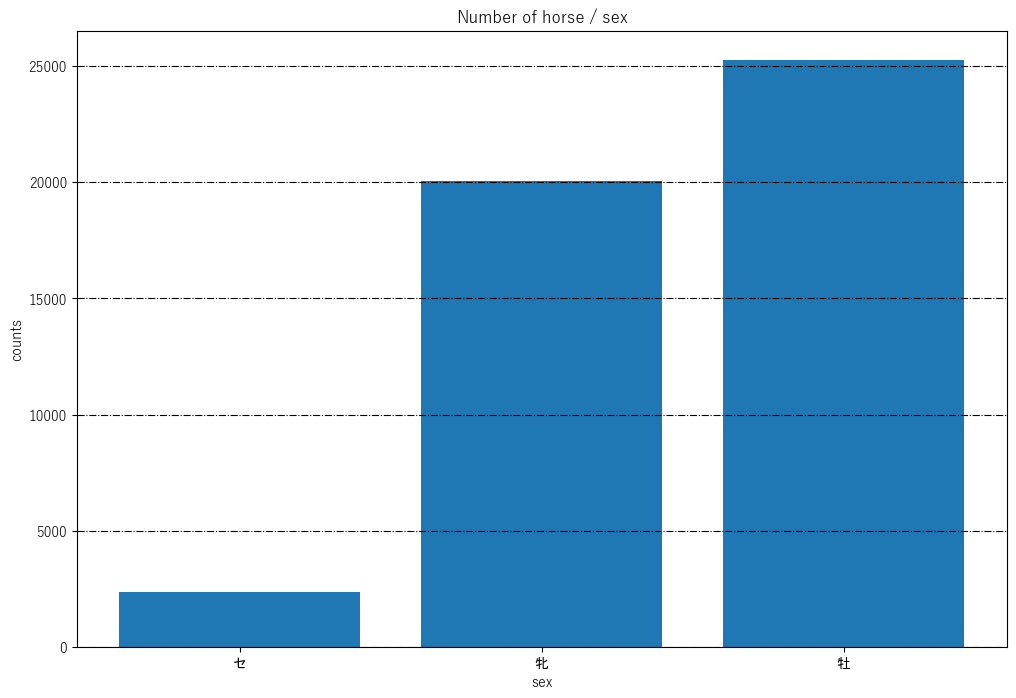

In [50]:
plot_bar_horse(df, "sex")

### age

In [51]:
df.age.unique()

array([ 2,  3,  4,  6,  5,  7,  8,  9, 10, 12, 11])

age
2      8082
3     19942
4      9123
5      6011
6      2898
7      1066
8       359
9       129
10       38
11       13
12       11
Name: count, dtype: int64

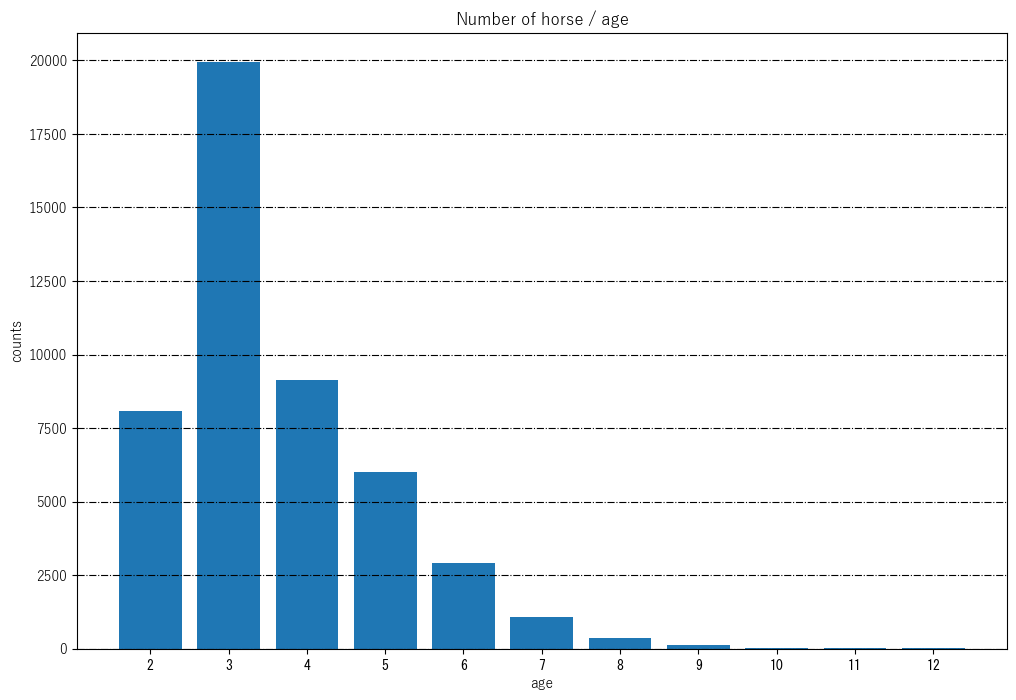

In [52]:
plot_bar_horse(df, "age")

### basis_weight

Text(0.5, 1.0, 'Number of horse / basis_weight')

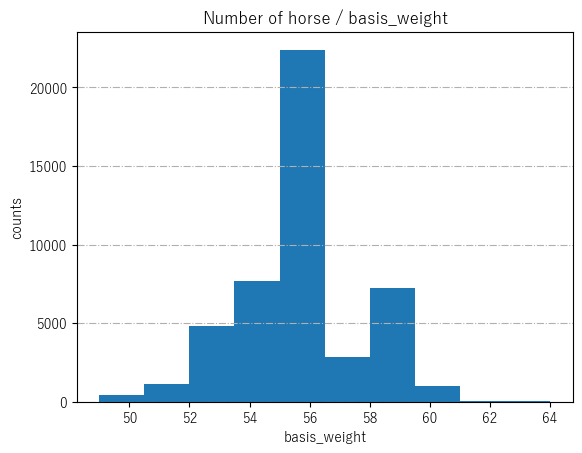

In [53]:
plt.hist(df.basis_weight)
plt.grid(which="major", axis="y", linestyle="-.")
plt.xlabel("basis_weight")
plt.ylabel("counts")
plt.title("Number of horse / basis_weight")

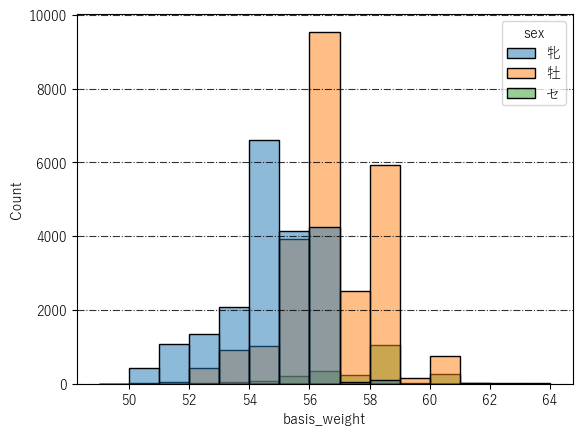

In [54]:
sns.histplot(data=df, x="basis_weight", binwidth=1, hue="sex")
plt.grid(which="major", axis="y", linestyle="-.", color="black", alpha=.8)

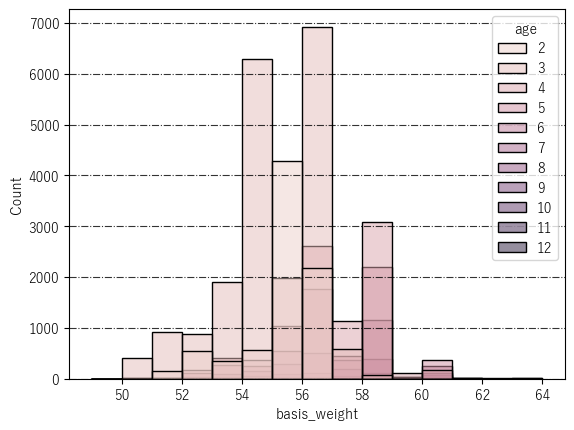

In [55]:
sns.histplot(data=df, x="basis_weight", binwidth=1, hue="age")
plt.grid(which="major", axis="y", linestyle="-.", color="black", alpha=.8)

### blinker

In [56]:
df.blinker.unique()

array([nan, 'B'], dtype=object)

欠損値はブリンカーを付けていない馬

### weight

レースの発走60分前に馬体検査、蹄鉄の検査、馬体重の測定を受ける。

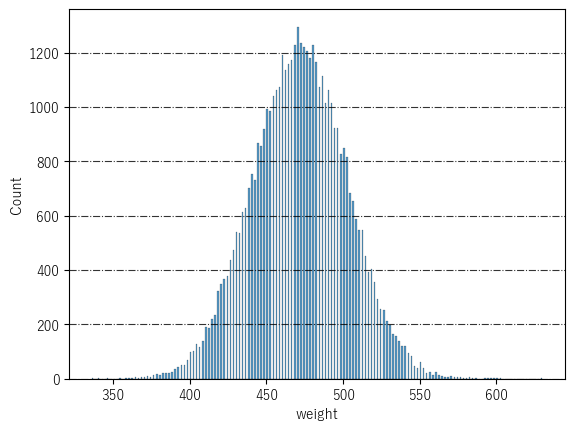

In [57]:
sns.histplot(data=df, x="weight", binwidth=1)
plt.grid(which="major", axis="y", linestyle="-.", color="black", alpha=.8)

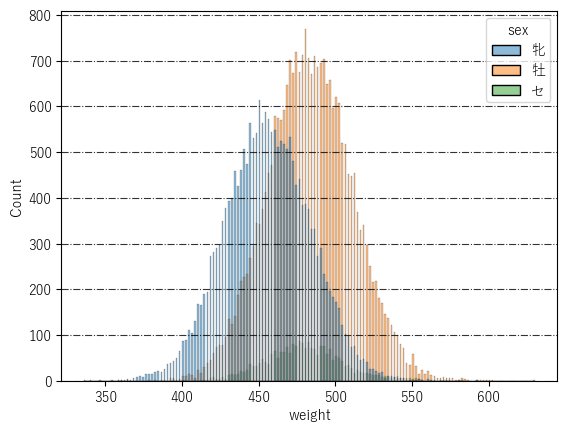

In [58]:
sns.histplot(data=df, x="weight", hue="sex", binwidth=1)
plt.grid(which="major", axis="y", linestyle="-.", color="black", alpha=.8)

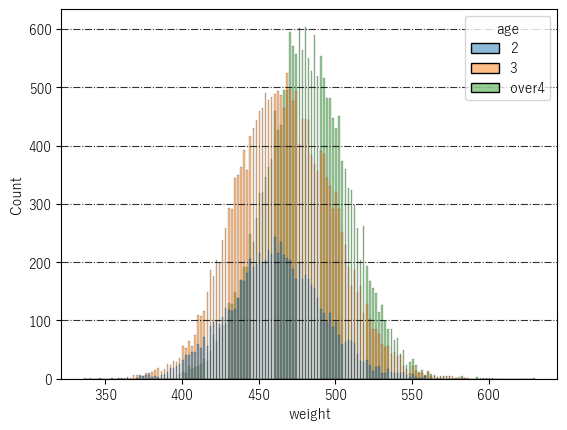

In [59]:
tmp = df.copy()
tmp["age"] = tmp["age"].apply(lambda x: x if x < 4 else 4)
tmp["age"] = tmp["age"].astype(str).replace({"4": "over4"})
sns.histplot(data=tmp, x="weight", hue="age",binwidth=1)
plt.grid(which="major", axis="y", linestyle="-.", color="black", alpha=.8)

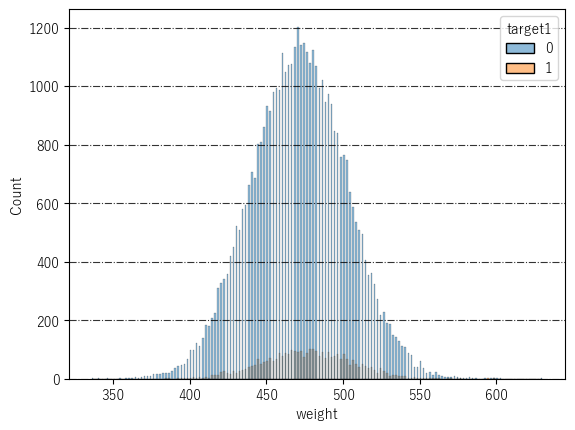

In [60]:
sns.histplot(data=df, x="weight", hue="target1", binwidth=1)
plt.grid(which="major", axis="y", linestyle="-.", color="black", alpha=.8)

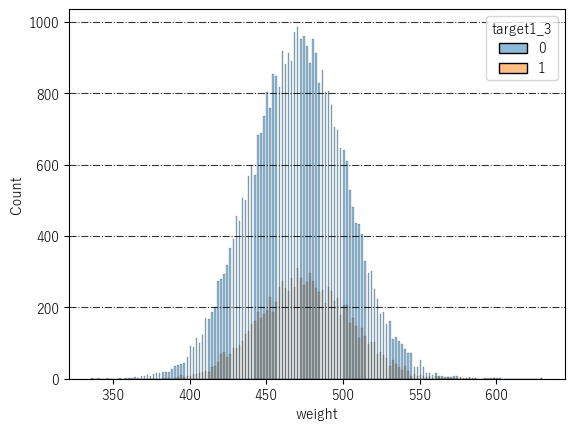

In [61]:
sns.histplot(data=df, x="weight", hue="target1_3", binwidth=1)
plt.grid(which="major", axis="y", linestyle="-.", color="black", alpha=.8)

In [62]:
df.groupby(["target1"])["weight"].describe()

,count,mean,std,min,25%,50%,75%,max
target1,,,,,,,,
0,44134.0,470.674537,31.018364,336.0,450.0,470.0,492.0,630.0
1,3459.0,476.456201,29.354281,384.0,456.0,476.0,496.0,598.0


In [63]:
df.groupby(["target1_3"])["weight"].describe()

,count,mean,std,min,25%,50%,75%,max
target1_3,,,,,,,,
0,37217.0,470.063089,31.225756,336.0,448.0,470.0,492.0,630.0
1,10376.0,474.795104,29.583291,374.0,454.0,474.0,494.0,630.0


馬体重も関係ありそう

### inc_dec

前走からの体重の増減

In [64]:
tmp = df[df.inc_dec.isna()]
print("inc_dec null data: ", tmp.shape[0])

inc_dec null data:  4838


In [65]:
tmp[tmp.class_code == 15].shape[0] ## メイクデビューの馬の数

3931

#### inc_decがnullの理由
- 今回が初出走
    - メイクデビュー
    - 未勝利戦
- 前走で計量がなかった（機械が壊れた、暴れて計測できなかった等）
- 出走取消など、馬体重を測らなかった。

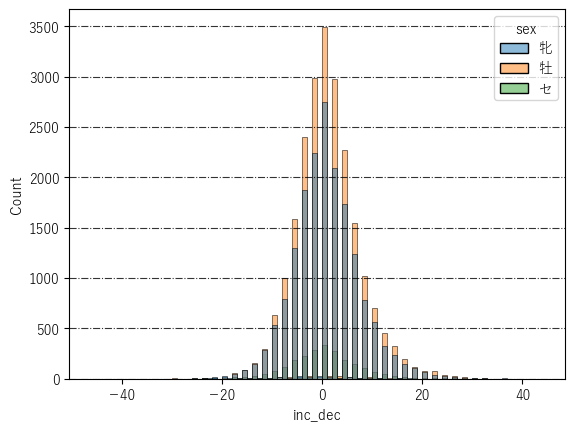

In [66]:
sns.histplot(data=df, x="inc_dec", hue="sex", binwidth=1)
plt.grid(which="major", axis="y", linestyle="-.", color="black", alpha=.8)

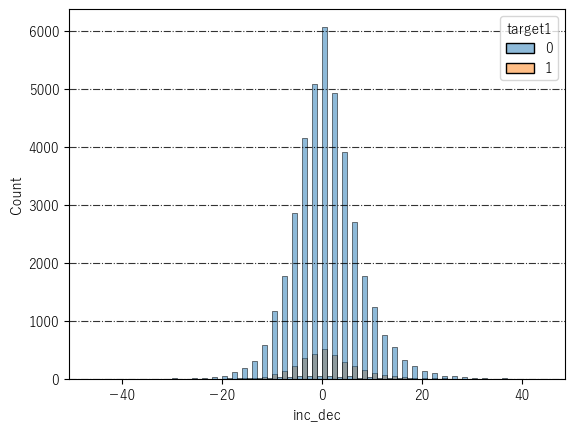

In [67]:
sns.histplot(data=df, x="inc_dec", hue="target1", binwidth=1)
plt.grid(which="major", axis="y", linestyle="-.", color="black", alpha=.8)

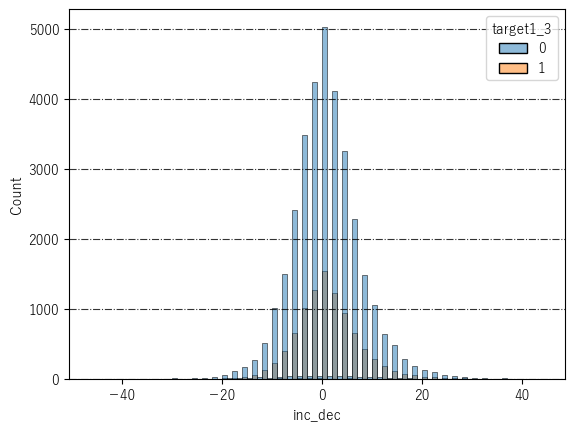

In [68]:
sns.histplot(data=df, x="inc_dec", hue="target1_3", binwidth=1)
plt.grid(which="major", axis="y", linestyle="-.", color="black", alpha=.8)

In [69]:
df.groupby(["target1"])["inc_dec"].describe()

,count,mean,std,min,25%,50%,75%,max
target1,,,,,,,,
0,39707.0,0.353086,6.673310,-46.0,-4.0,0.0,4.0,44.0
1,3127.0,0.609210,6.262044,-24.0,-4.0,0.0,4.0,32.0


In [70]:
df.groupby(["target1_3"])["inc_dec"].describe()

,count,mean,std,min,25%,50%,75%,max
target1_3,,,,,,,,
0,33439.0,0.330004,6.757224,-46.0,-4.0,0.0,4.0,44.0
1,9395.0,0.520490,6.224397,-24.0,-4.0,0.0,4.0,32.0


そんなに関係ない？

増減率も試してみる

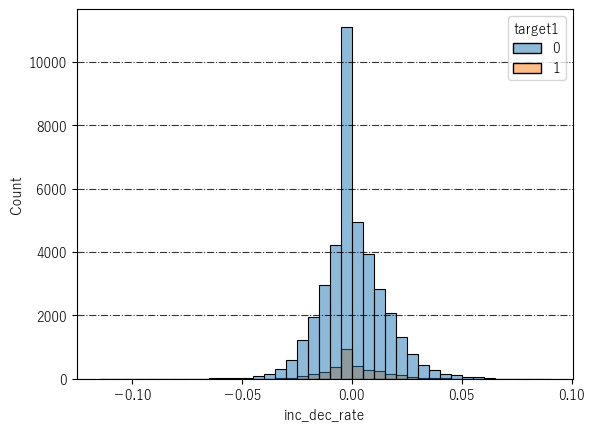

In [71]:
tmp = df.copy()
tmp["inc_dec_rate"] = tmp["inc_dec"] / tmp["weight"]
sns.histplot(data=tmp, x="inc_dec_rate", hue="target1", binwidth=0.005)
plt.grid(which="major", axis="y", linestyle="-.", color="black", alpha=.8)

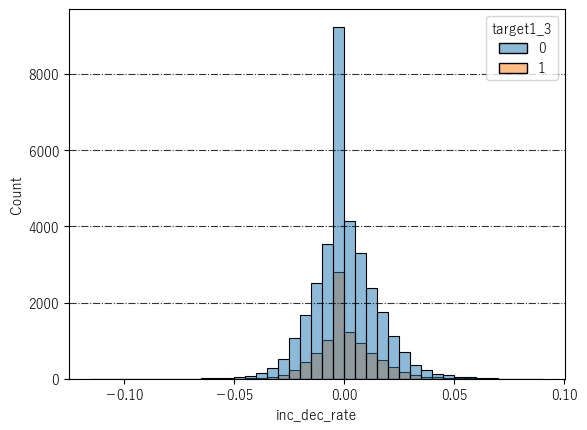

In [72]:
sns.histplot(data=tmp, x="inc_dec_rate", hue="target1_3", binwidth=0.005)
plt.grid(which="major", axis="y", linestyle="-.", color="black", alpha=.8)

### weight_code

In [73]:
df.weight_code.unique()

array([3, 4, 1, 2])

- 1 ... ハンデ （出走馬の実績や最近の状態などを考慮し、JRAのハンデキャップ作成委員が出走馬の負担重量を決定する）
- 2 ... 別定（レース毎に負担重量を決定する基準が設けられているレース）
- 3 ... 馬齢（負担重量を馬の年齢によって定める方法）
- 4 ... 定量　（馬の年齢または性別により、出走馬の全馬に一定の負担重量を定める方法）

### win_odds

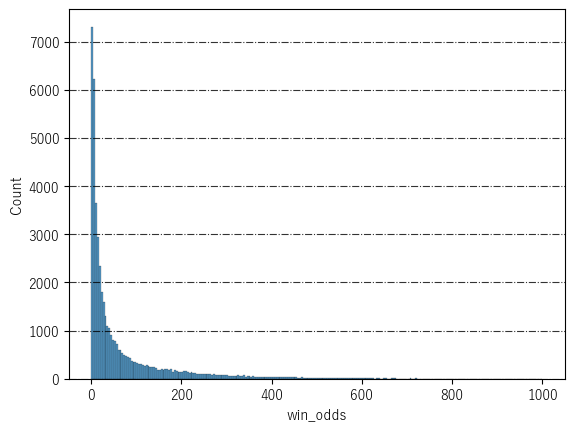

In [74]:
sns.histplot(data=df, x="win_odds")
plt.grid(which="major", axis="y", linestyle="-.", color="black", alpha=.8)

In [75]:
tmp = df[df.win_odds.isna()]
tmp.error_code.unique()

array([3, 1])

欠損の場合、競争除外 or 出走取消

### rank

In [76]:
sorted(df["rank"].unique())

[np.int64(0),
 np.int64(1),
 np.int64(2),
 np.int64(3),
 np.int64(4),
 np.int64(5),
 np.int64(6),
 np.int64(7),
 np.int64(8),
 np.int64(9),
 np.int64(10),
 np.int64(11),
 np.int64(12),
 np.int64(13),
 np.int64(14),
 np.int64(15),
 np.int64(16),
 np.int64(17),
 np.int64(18)]

In [77]:
tmp = df[df["rank"] == 0].error_code.unique()
tmp

array([3, 4, 1])

rankの欠損値は全て0埋めされている。

### time_diff

In [78]:
df["time_diff"].info()

<class 'pandas.core.series.Series'>
RangeIndex: 47672 entries, 0 to 47671
Series name: time_diff
Non-Null Count  Dtype 
--------------  ----- 
47672 non-null  object
dtypes: object(1)
memory usage: 372.6+ KB


In [79]:
tmp = df[df.time_diff == "----"]
tmp["error_code"].unique()

array([3, 4, 1])

"----" の場合、出走取消 or 競争除外 or 競争中止

### last_3F_time

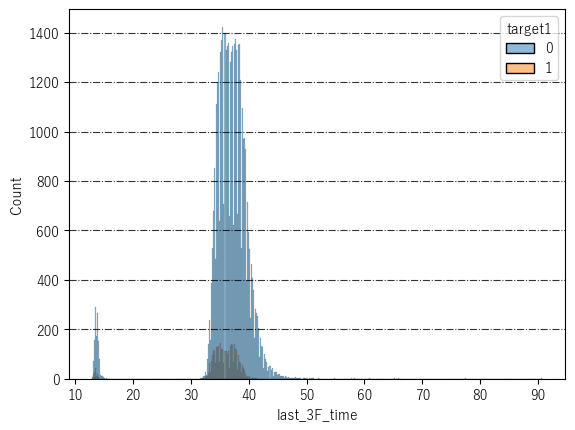

In [80]:
sns.histplot(data=df, x="last_3F_time", hue="target1")
plt.grid(which="major", axis="y", linestyle="-.", color="black", alpha=.8)

障害レースでは平均1Fという単位を用いるようなので注意が必要（棒グラフの左の山が障害レースを表している）

In [81]:
tmp = df[df.last_3F_time > 30]
tmp.groupby(["target1"])["last_3F_time"].describe()

,count,mean,std,min,25%,50%,75%,max
target1,,,,,,,,
0,42571.0,37.219274,2.303743,31.7,35.5,37.0,38.7,90.8
1,3332.0,36.085054,1.691987,32.0,34.7,36.0,37.4,41.3


In [82]:
tmp.groupby(["target1_3"])["last_3F_time"].describe()

,count,mean,std,min,25%,50%,75%,max
target1_3,,,,,,,,
0,35908.0,37.384229,2.352996,31.8,35.6,37.2,38.9,90.8
1,9995.0,36.248544,1.748481,31.7,34.8,36.2,37.6,42.2


In [83]:
tmp["dist_bin"] = pd.cut(tmp.dist, [999, 2000, 3000, 4000])
tmp.groupby(["target1", "dist_bin"])["last_3F_time"].describe()

C:\Users\ken05\AppData\Local\Temp\ipykernel_15868\3147239329.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tmp["dist_bin"] = pd.cut(tmp.dist, [999, 2000, 3000, 4000])
C:\Users\ken05\AppData\Local\Temp\ipykernel_15868\3147239329.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  tmp.groupby(["target1", "dist_bin"])["last_3F_time"].describe()


count       mean       std   min     25%    50%  \
target1 dist_bin                                                          
0       (999, 2000]   39603.0  37.232705  2.308456  31.7  35.500  37.10   
        (2000, 3000]   2924.0  37.048495  2.236159  32.9  35.400  36.70   
        (3000, 4000]     44.0  36.479545  1.918403  33.9  35.575  35.95   
1       (999, 2000]    3083.0  36.116737  1.701953  32.0  34.700  36.10   
        (2000, 3000]    246.0  35.697561  1.520551  33.1  34.425  35.40   
        (3000, 4000]      3.0  35.300000  0.360555  34.9  35.150  35.40   

                         75%   max  
target1 dist_bin                    
0       (999, 2000]   38.700  90.8  
        (2000, 3000]  38.300  51.9  
        (3000, 4000]  37.425  44.8  
1       (999, 2000]   37.400  41.3  
        (2000, 3000]  36.800  40.1  
        (3000, 4000]  35.500  35.6

### Ave_3F

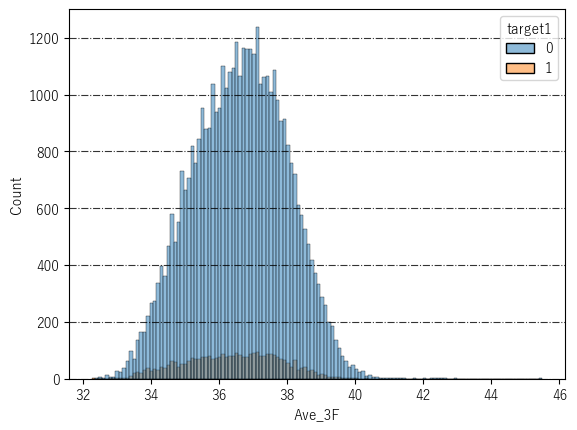

In [95]:
sns.histplot(data=df, x="Ave_3F", hue="target1", binwidth=0.1)
plt.grid(which="major", axis="y", linestyle="-.", color="black", alpha=.8)

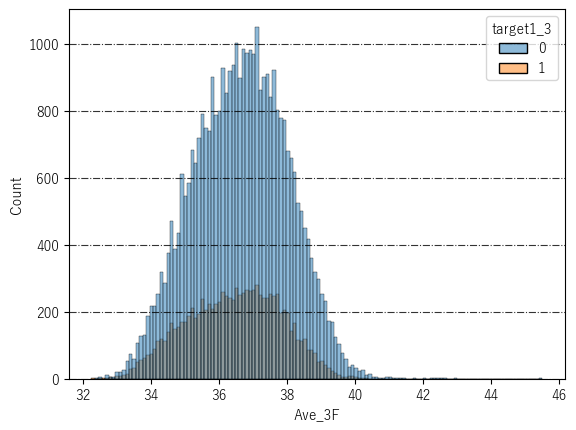

In [96]:
sns.histplot(data=df, x="Ave_3F", hue="target1_3", binwidth=0.1)
plt.grid(which="major", axis="y", linestyle="-.", color="black", alpha=.8)

In [86]:
df.groupby(["target1"])["Ave_3F"].describe()

,count,mean,std,min,25%,50%,75%,max
target1,,,,,,,,
0,42571.0,36.609351,1.375097,32.40,35.60,36.65,37.60,45.50
1,3332.0,36.380906,1.386449,32.25,35.34,36.45,37.44,40.35


In [87]:
df.groupby(["target1_3"])["Ave_3F"].describe()

,count,mean,std,min,25%,50%,75%,max
target1_3,,,,,,,,
0,35908.0,36.636739,1.375002,32.40,35.64,36.68,37.63,45.50
1,9995.0,36.434800,1.373502,32.25,35.40,36.50,37.48,40.35


少し関係ある？

### PCI

PCIとは、ペースチェンジ指数を意味し、その算出方法は、上がり３ハロンの位置を分岐点とし、その前後の走破タイムからそれぞれ速度を計算し、その比を表したものです。つまり、３ハロン前後で、どれだけ速度が変わったかを表しています。数値が約５０で前後半が同一程度のペースになり、それより小さい値だと、後半の速度が低下したことを意味し、大きい場合は、速度が速くなったことを意味しています。

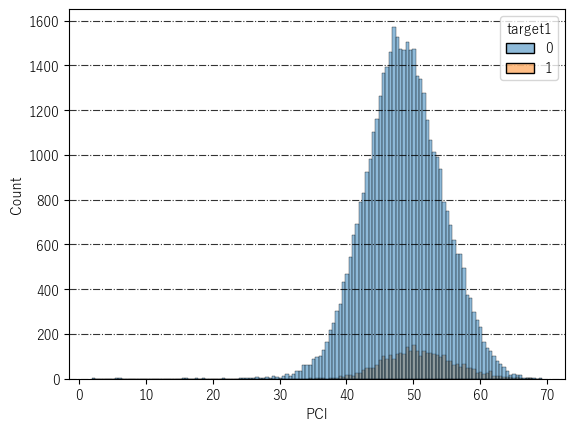

In [88]:
sns.histplot(data=df, x="PCI", hue="target1", binwidth=0.5)
plt.grid(which="major", axis="y", linestyle="-.", color="black", alpha=.8)

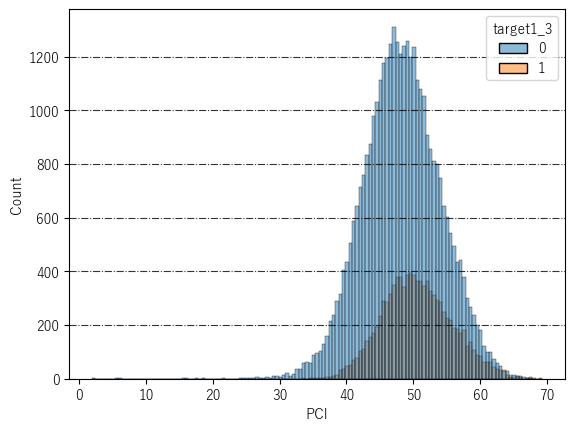

In [89]:
sns.histplot(data=df, x="PCI", hue="target1_3", binwidth=0.5)
plt.grid(which="major", axis="y", linestyle="-.", color="black", alpha=.8)

In [90]:
df.groupby(["target1"])["PCI"].describe()

,count,mean,std,min,25%,50%,75%,max
target1,,,,,,,,
0,42570.0,48.642248,5.724163,1.9,44.9,48.6,52.4,69.3
1,3332.0,50.990126,5.209143,34.8,47.3,50.7,54.4,67.8


In [91]:
df.groupby(["target1_3"])["PCI"].describe()

,count,mean,std,min,25%,50%,75%,max
target1_3,,,,,,,,
0,35907.0,48.289537,5.745745,1.9,44.5,48.2,52.1,67.7
1,9995.0,50.692066,5.214271,33.5,47.0,50.4,54.1,69.3


関係がありそう

### leg

In [100]:
df.leg.unique()

array(['後方', '中団', '先行', '逃げ', '差し', 'ﾏｸﾘ', '追込', nan], dtype=object)

In [101]:
df[df.leg.isna()].error_code.unique()

array([3, 4, 1])

欠損値は全て異常終了

leg
中団     12621
先行     12122
差し      4483
後方     12713
追込      1379
逃げ      3628
ﾏｸﾘ      328
Name: count, dtype: int64

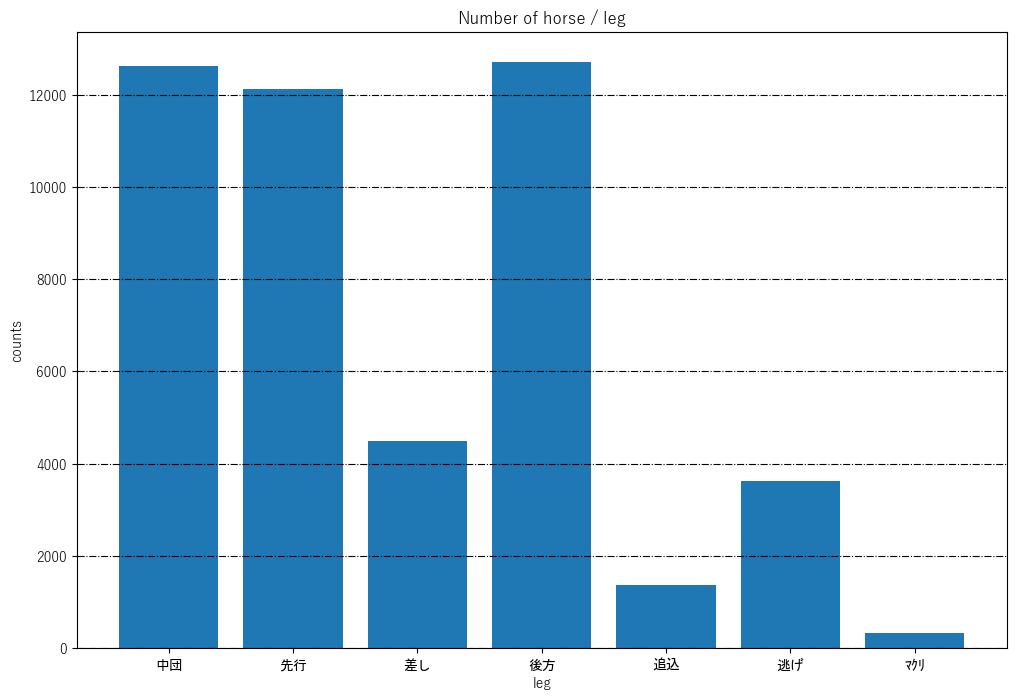

In [102]:
plot_bar_horse(df, "leg")

- 逃げ（逃げ馬）：レース開始直後から先頭で走り、最後までその位置を維持する。
- 先行（先行馬）：レース序盤で先頭集団に位置し、最後までその近くにいる。
- 差し（差し馬）：レース後半で前方に追い上げる。
- 追込（追込馬）：レース終盤で後方から一気に追い込む。
- 中団（中団馬）：レース中盤で中位に位置する。
- 後方（後方馬）：レース中盤で後方に位置する。
- マクリ（マクリ馬）：レース中盤で一気に先頭集団に加わる。

### error_code

In [92]:
df.error_code.unique()

array([0, 3, 4, 1, 7])

- 0 ... 正常終了
- 1 ... 出走取消（競走馬が装鞍所に入る前に出走を取りやめること）
- 2 ... 発走除外（競争除外のこと。平成12年以降は競争除外と名前が統一されたため、2のデータはない （URL:https://developer.jra-van.jp/t/topic/324））
- 3 ... 競争除外（装鞍所に入った後からレース発走までの間に病気・ケガなどが発生し、裁決委員の判断で競走から除外されること）

ここまではレース前に分かる。該当馬券は全額返金
ここからはレース前には分からない。

- 4 ... 競争中止（正しい発走合図（ゲートが開く）後に決勝線へ到達しなかった場合に適用されます。競走中止につながる要因の一例として、レース中の疾病・落馬・逃避など）
- 5 ... 失格（「極めて悪質で他の騎手や馬に対する危険な行為によって、競走に重大な支障を生じさせた」と裁決委員が判断した場合）
- 6 ... 落馬再騎乗（レース中に落馬して競走を中断した騎手が、再度馬に乗って競走を続行すること。以前は認められていたが、2017年1月1日より、再騎乗して競走を継続することは禁止された）
- 7 ... 降着（裁決委員が、加害馬の違反行為により被害馬が走行を妨害されたと認める事象で、かつその妨害行為がなければ被害馬が加害馬より先に入線していたと判断した場合）

error_code
0    47273
1       78
3      101
4      219
7        1
Name: count, dtype: int64

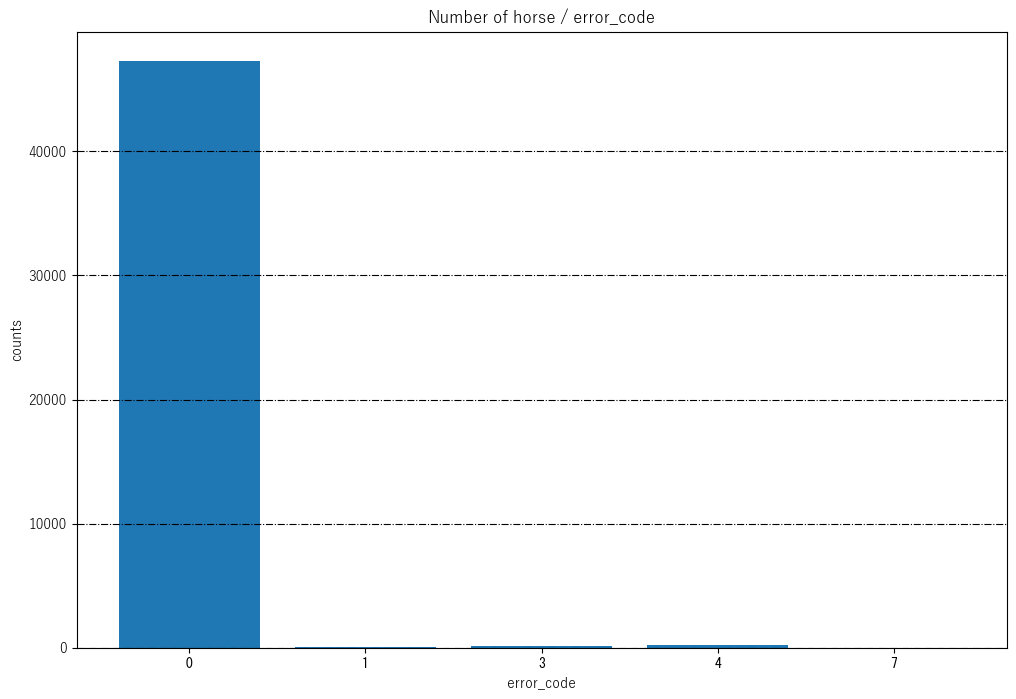

In [98]:
plot_bar_horse(df, "error_code")